In [ ]:
import os
from xl_kv_injection_pipeline.xl_kv_injection_pipeline import ADPipeline
from diffusers import DDIMScheduler, AutoencoderKL,UNet2DConditionModel
import torch
from tools.utils import *
from accelerate.utils import set_seed
import random

model_name = "/your path to your sdxl model such as stabilityai/stable-diffusion-xl-base-1.0" #https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0


seed =random.randint(1,1000)
mixed_precision = "bf16"
num_inference_steps = 50

num_images_per_prompt = 1
enable_gradient_checkpoint = True



scheduler = DDIMScheduler.from_pretrained(model_name, subfolder="scheduler")
pipe = ADPipeline.from_pretrained(
    model_name, scheduler=scheduler, safety_checker=None
)


pipe.classifier = pipe.unet
set_seed(seed)






Keyword arguments {'safety_checker': None} are not expected by ADPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Total self attention layers of Unet:  70
Self attention layers for AD:  [64, 65, 66, 67, 68, 69]


Sample: 100%|██████████| 50/50 [00:13<00:00,  3.60it/s]


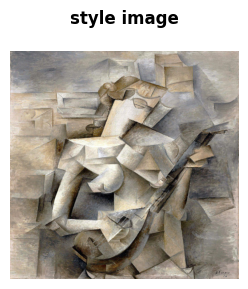

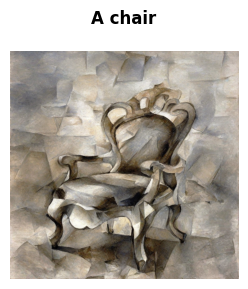

In [3]:
guidance_scale = 7.0
spg_scale=3.0
start_layer, end_layer = 64, 70
controller = Controller(self_layers=(start_layer, end_layer))
prompt ="A chair"
style_image = ["style/4.jpg"]
style_image = torch.cat([load_image(path, size=(1024, 1024)) for path in style_image])
seed=100
generator=torch.Generator(seed)
result = pipe.sample(
    controller=controller,
    adain=True,
    height=1024,
    width=1024,
    mixed_precision="bf16",
    style_image=style_image,
    prompt=prompt,
    negative_prompt="",
    guidance_scale=guidance_scale,
    spg_scale=spg_scale,
    num_inference_steps=num_inference_steps,
    num_images_per_prompt=num_images_per_prompt,
    enable_gradient_checkpoint=enable_gradient_checkpoint,

)

save_image(style_image, "output/style.png")
save_image(result, "output/output.png")
show_image("output/style.png", title="style image")
show_image("output/output.png", title=prompt)